# Interpretasi Kolom:
Sementara saya tidak memiliki deskripsi yang spesifik, berdasarkan nama kolom, dapat diasumsikan bahwa:
- Date: Tanggal dan waktu dari pengamatan harga minyak.
- Close: Harga penutup pada waktu tertentu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
data = pd.read_csv('brentcrudeoil - weeklybrentoil.csv')

In [3]:
data.head()

,Date,Close,Date.1,Close.1,Unnamed: 4,Unnamed: 5
0,1/8/2021 23:58:00,53.33,12/13/2023 16:00:00,133.97,NaN,NaN
1,1/15/2021 23:58:00,53.53,12/14/2023 16:00:00,133.20,NaN,NaN
2,1/22/2021 23:58:00,53.22,12/15/2023 16:00:00,133.84,NaN,NaN
3,1/29/2021 23:58:00,52.79,12/18/2023 16:00:00,137.19,NaN,NaN
4,2/5/2021 23:58:00,56.27,12/19/2023 16:00:00,138.10,NaN,NaN


In [4]:
delete_col = ['Unnamed: 4', 'Unnamed: 5']

In [5]:
data = data.drop(columns=delete_col)

In [6]:
data_valid = data.dropna(subset=['Date.1', 'Close.1'])

# Gabungkan dua set kolom menjadi satu set data tunggal
data_combined = pd.concat([data_valid['Date'], data_valid['Close'], data_valid['Date.1'], data_valid['Close.1']], axis=1)
data_combined.columns = ['Date_1', 'Close_1', 'Date_2', 'Close_2']

In [7]:
data_combined['Date_1'] = pd.to_datetime(data_combined['Date_1'], format='%m/%d/%Y %H:%M:%S')
data_combined['Date_2'] = pd.to_datetime(data_combined['Date_2'], format='%m/%d/%Y %H:%M:%S')

In [8]:
data_combined.head(30)

,Date_1,Close_1,Date_2,Close_2
0,2021-01-08 23:58:00,53.33,2023-12-13 16:00:00,133.97
1,2021-01-15 23:58:00,53.53,2023-12-14 16:00:00,133.20
2,2021-01-22 23:58:00,53.22,2023-12-15 16:00:00,133.84
3,2021-01-29 23:58:00,52.79,2023-12-18 16:00:00,137.19
4,2021-02-05 23:58:00,56.27,2023-12-19 16:00:00,138.10
5,2021-02-12 23:58:00,58.45,2023-12-20 16:00:00,139.66
6,2021-02-19 23:58:00,58.73,2023-12-21 16:00:00,141.80
7,2021-02-26 23:58:00,60.60,2023-12-22 16:00:00,142.72
8,2021-03-05 23:58:00,64.58,2023-12-26 16:00:00,142.82
9,2021-03-12 23:58:00,64.79,2023-12-27 16:00:00,141.44


In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Check Outliers

In [12]:
time_series_data = data_combined[['Date_1', 'Close_1']]
time_series_data.columns = ['Date', 'Close']
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)
summary_stats = time_series_data['Close'].describe()
print(summary_stats)

count    19.000000
mean     60.401579
std       4.634290
min      52.790000
25%      57.360000
50%      61.710000
75%      64.185000
max      66.630000
Name: Close, dtype: float64


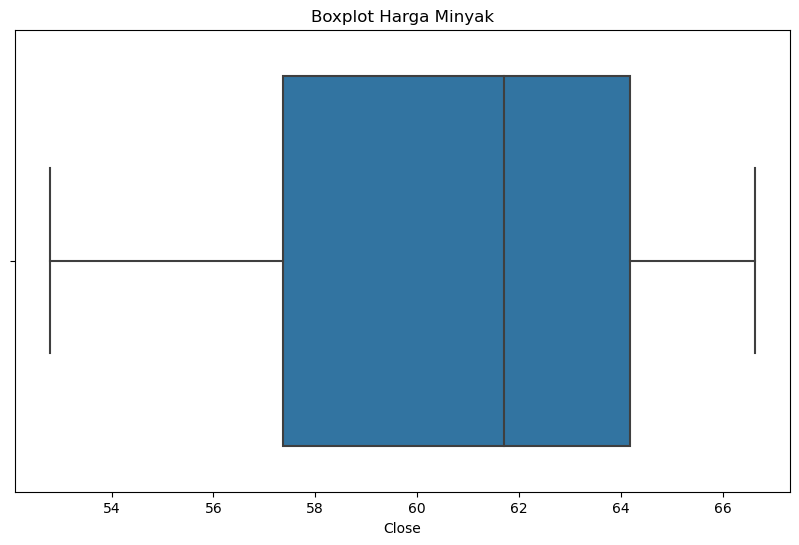

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat diagram boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=time_series_data['Close'])
plt.title('Boxplot Harga Minyak')
plt.show()

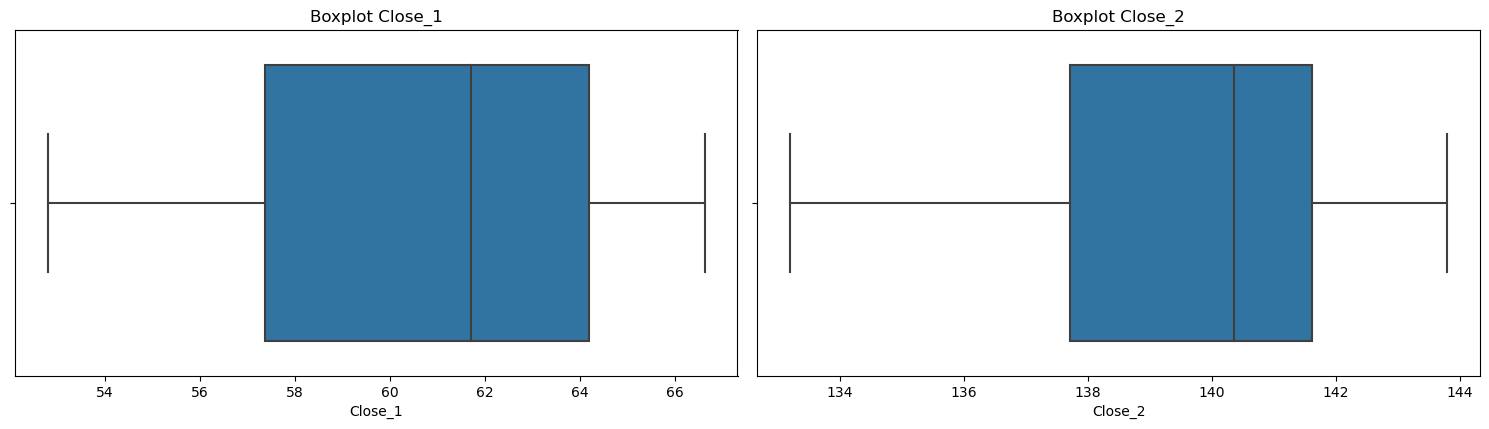

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data_combined.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_combined[column])
    plt.title(f'Boxplot {column}')
    plt.tight_layout()

plt.show()

## EDA

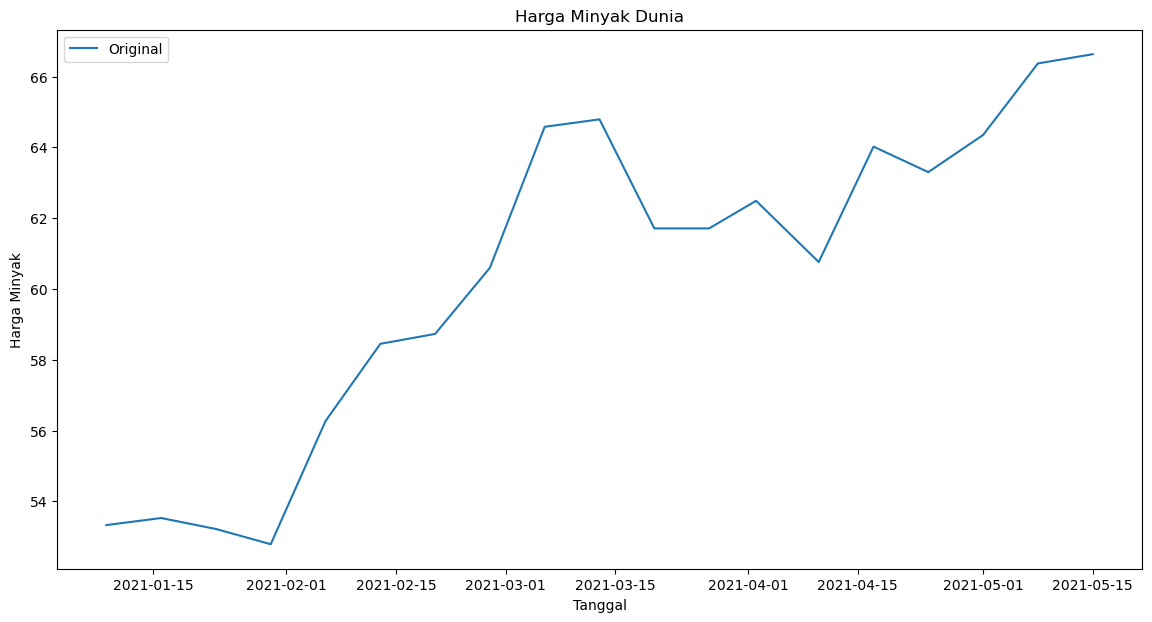

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Close'], label='Original')
plt.title('Harga Minyak Dunia')
plt.xlabel('Tanggal')
plt.ylabel('Harga Minyak')
plt.legend()
plt.show()

- Grafik Original Time Series diatas menunjukkan bagaimana harga minyak berubah seiring berjalannya waktu.

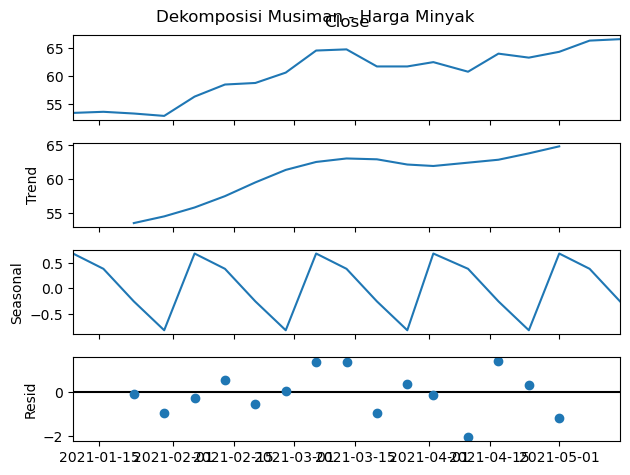

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Plot tren, musiman, dan residu menggunakan metode dekomposisi
result = seasonal_decompose(time_series_data['Close'], model='additive', period=4)
result.plot()
plt.suptitle('Dekomposisi Musiman - Harga Minyak')
plt.show()

- Trend : Grafik menunjukkan tren naik, yang berarti harga minyak cenderung meningkat seiring waktu.
Terdapat beberapa penurunan sementara selama perjalanan naik, namun penurunan ini tidak signifikan dan grafik tetap bergerak menuju naik secara keseluruhan.
Seasonal:

- Pola musiman : Grafik dimulai dari 0.5, kemudian menurun ke -0.5, lalu kembali naik ke 0.5, dan seterusnya.
Pola ini mungkin mencerminkan fluktuasi harga minyak yang terjadi secara berkala, mungkin sesuai dengan musim atau siklus tertentu.


- Residu: Dari 15 titik plot, 8 berada di bawah garis 0, menunjukkan bahwa sebagian besar residu cenderung negatif.
Satu titik plot berada tepat di tengah-tengah (0), dan 6 titik plot berada di atas garis 0.
Residu yang cenderung negatif mungkin menunjukkan bahwa tren dan musiman telah berhasil menjelaskan sebagian besar variasi dalam data.

## Analisis Time Series dengan Moving Averages dan Exponential Smoothing

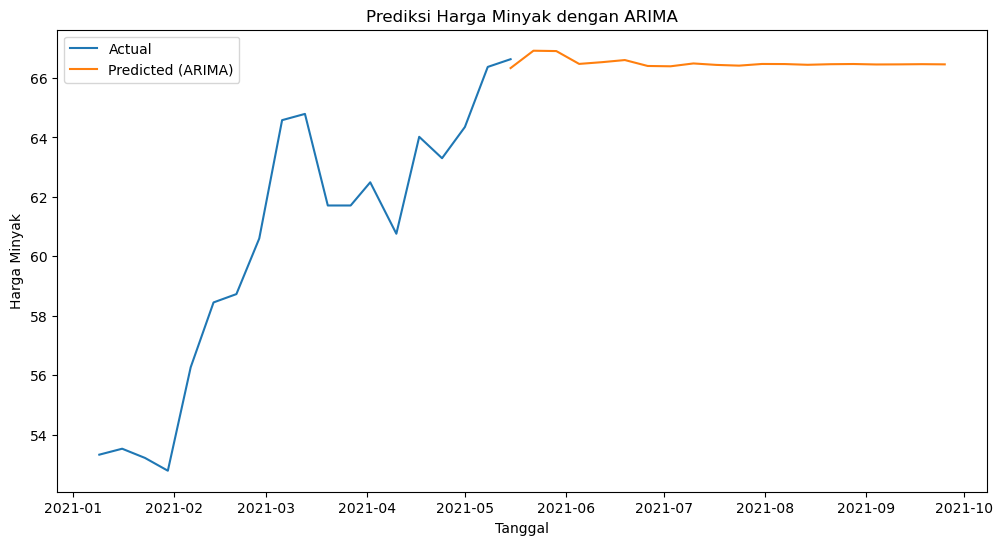

In [17]:
# Pisahkan data untuk analisis time series
time_series_data = data_combined[['Date_1', 'Close_1']]
time_series_data.columns = ['Date', 'Close']

# Ubah indeks menjadi datetime
time_series_data.set_index('Date', inplace=True)

# Terapkan ARIMA
model_arima = ARIMA(time_series_data['Close'], order=(5, 1, 0))  # Sesuaikan dengan kebutuhan
result_arima = model_arima.fit()

# Tentukan jumlah langkah ke depan yang ingin Anda prediksi
steps = 20

# Prediksi menggunakan model ARIMA
predictions_arima = result_arima.predict(start=len(time_series_data), end=len(time_series_data) + steps - 1, typ='levels')

# Tampilkan hasil prediksi ARIMA
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Actual')
plt.plot(pd.date_range(start=time_series_data.index[-1], periods=steps, freq='W-FRI'), predictions_arima, label='Predicted (ARIMA)')
plt.title('Prediksi Harga Minyak dengan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Minyak')
plt.legend()
plt.show()

In [18]:
# Data aktual
actual_data = time_series_data['Close'].iloc[-len(predictions_arima):]

# Evaluasi model
mse = mean_squared_error(actual_data, predictions_arima[:-1])  # Menggunakan [: -1] untuk memotong hasil prediksi
mae = mean_absolute_error(actual_data, predictions_arima[:-1])

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 58.231829365198244
Mean Absolute Error (MAE): 6.1193617997715135


R2 Score (Moving Averages): -0.1496
Mean Squared Error (MSE) (Moving Averages): 9.5637


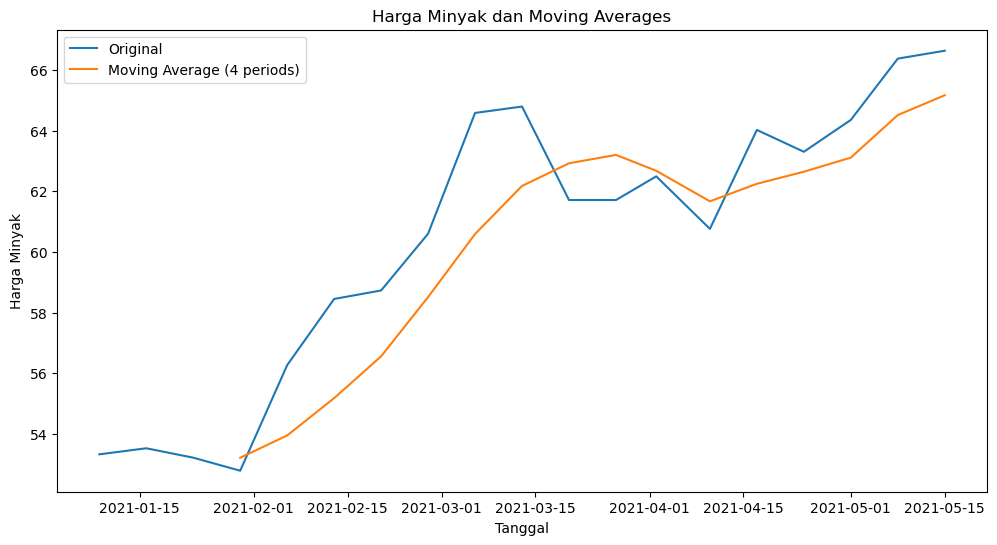

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

window_size = 4  
rolling_mean = time_series_data['Close'].rolling(window=window_size).mean()

rolling_mean = rolling_mean.dropna()

actual_data = time_series_data['Close'][window_size:]

# Memotong hasil prediksi agar panjangnya sesuai dengan data aktual
predictions_ma = rolling_mean[:len(actual_data)]

# Menghitung skor R2 dan MSE
r2_ma = r2_score(actual_data, predictions_ma)
mse_ma = mean_squared_error(actual_data, predictions_ma)

# Menampilkan skor
print(f'R2 Score (Moving Averages): {r2_ma:.4f}')
print(f'Mean Squared Error (MSE) (Moving Averages): {mse_ma:.4f}')

# Plot original series dan moving averages
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Close'], label='Original')
plt.plot(rolling_mean, label=f'Moving Average ({window_size} periods)')
plt.title('Harga Minyak dan Moving Averages')
plt.xlabel('Tanggal')
plt.ylabel('Harga Minyak')
plt.legend()
plt.show()

R2 Score (Exponential Smoothing): 0.8895
Mean Squared Error (MSE) (Exponential Smoothing): 2.2481


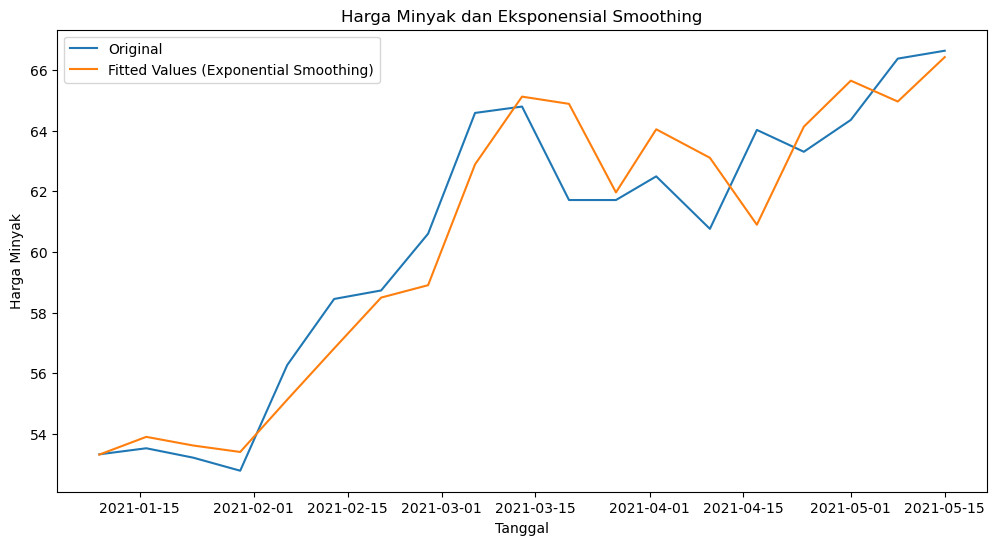

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat dan fitting model eksponensial smoothing
model_eks = ExponentialSmoothing(time_series_data['Close'], trend='add', seasonal='add', seasonal_periods=4)
result_eks = model_eks.fit()

# Prediksi menggunakan model eksponensial smoothing
predictions_eks = result_eks.fittedvalues

# Menghilangkan nilai NaN pada data aktual yang sesuai dengan panjang window
actual_data_eks = time_series_data['Close'].dropna()

# Memotong hasil prediksi agar panjangnya sesuai dengan data aktual
predictions_eks = predictions_eks[:len(actual_data_eks)]

# Menghitung skor R2 dan MSE
r2_eks = r2_score(actual_data_eks, predictions_eks)
mse_eks = mean_squared_error(actual_data_eks, predictions_eks)

# Menampilkan skor
print(f'R2 Score (Exponential Smoothing): {r2_eks:.4f}')
print(f'Mean Squared Error (MSE) (Exponential Smoothing): {mse_eks:.4f}')

# Plot original series dan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(actual_data_eks, label='Original')
plt.plot(predictions_eks, label='Fitted Values (Exponential Smoothing)')
plt.title('Harga Minyak dan Eksponensial Smoothing')
plt.xlabel('Tanggal')
plt.ylabel('Harga Minyak')
plt.legend()
plt.show()

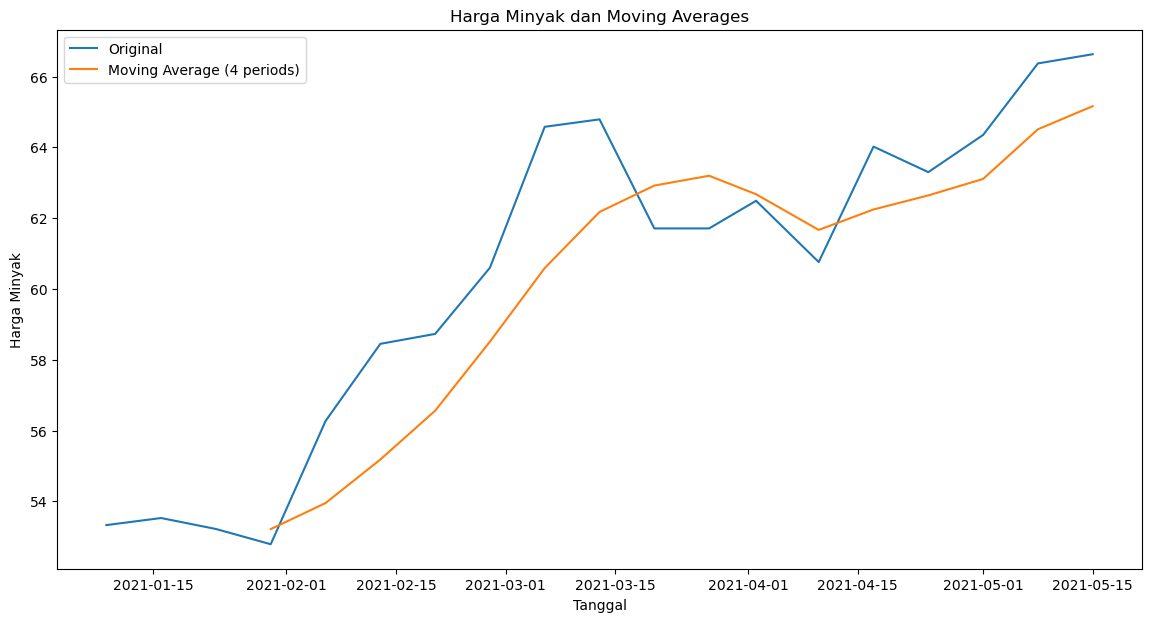

In [21]:
# Plot tren menggunakan moving averages
window_size = 4
rolling_mean = time_series_data['Close'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Close'], label='Original')
plt.plot(rolling_mean, label=f'Moving Average ({window_size} periods)')
plt.title('Harga Minyak dan Moving Averages')
plt.xlabel('Tanggal')
plt.ylabel('Harga Minyak')
plt.legend()
plt.show()

In [22]:
data_combined.head(19)

,Date_1,Close_1,Date_2,Close_2
0,2021-01-08 23:58:00,53.33,2023-12-13 16:00:00,133.97
1,2021-01-15 23:58:00,53.53,2023-12-14 16:00:00,133.20
2,2021-01-22 23:58:00,53.22,2023-12-15 16:00:00,133.84
3,2021-01-29 23:58:00,52.79,2023-12-18 16:00:00,137.19
4,2021-02-05 23:58:00,56.27,2023-12-19 16:00:00,138.10
5,2021-02-12 23:58:00,58.45,2023-12-20 16:00:00,139.66
6,2021-02-19 23:58:00,58.73,2023-12-21 16:00:00,141.80
7,2021-02-26 23:58:00,60.60,2023-12-22 16:00:00,142.72
8,2021-03-05 23:58:00,64.58,2023-12-26 16:00:00,142.82
9,2021-03-12 23:58:00,64.79,2023-12-27 16:00:00,141.44


In [23]:
# Simpan hasil prediksi Moving Averages ke dalam DataFrame
predictions_ma_df = pd.DataFrame({
    'Date': time_series_data['Close'][window_size:].index,
    'Actual_Close': actual_data.values,
    'Predicted_MA': predictions_ma.values
})

# Simpan DataFrame hasil prediksi Moving Averages ke dalam file CSV
predictions_ma_df.to_csv('hasil_prediksi_ma.csv', index=False)

# Simpan hasil prediksi Eksponensial Smoothing ke dalam DataFrame
predictions_eks_df = pd.DataFrame({
    'Date': actual_data_eks.index,
    'Actual_Close': actual_data_eks.values,
    'Predicted_Exponential_Smoothing': predictions_eks.values
})

# Simpan DataFrame hasil prediksi Eksponensial Smoothing ke dalam file CSV
predictions_eks_df.to_csv('hasil_prediksi_eks.csv', index=False)

In [24]:
data.head(30)

,Date,Close,Date.1,Close.1
0,1/8/2021 23:58:00,53.33,12/13/2023 16:00:00,133.97
1,1/15/2021 23:58:00,53.53,12/14/2023 16:00:00,133.20
2,1/22/2021 23:58:00,53.22,12/15/2023 16:00:00,133.84
3,1/29/2021 23:58:00,52.79,12/18/2023 16:00:00,137.19
4,2/5/2021 23:58:00,56.27,12/19/2023 16:00:00,138.10
5,2/12/2021 23:58:00,58.45,12/20/2023 16:00:00,139.66
6,2/19/2021 23:58:00,58.73,12/21/2023 16:00:00,141.80
7,2/26/2021 23:58:00,60.60,12/22/2023 16:00:00,142.72
8,3/5/2021 23:58:00,64.58,12/26/2023 16:00:00,142.82
9,3/12/2021 23:58:00,64.79,12/27/2023 16:00:00,141.44


In [25]:
last_date = data_combined['Date_2'].dropna().iloc[-1]  # Ambil tanggal terakhir yang tidak NaN
data['Date.1'].fillna(last_date + pd.Timedelta(days=1), inplace=True)
data['Close.1'].fillna(predictions_arima.values[-1], inplace=True)

In [26]:
data.head(30)

,Date,Close,Date.1,Close.1
0,1/8/2021 23:58:00,53.33,12/13/2023 16:00:00,133.970000
1,1/15/2021 23:58:00,53.53,12/14/2023 16:00:00,133.200000
2,1/22/2021 23:58:00,53.22,12/15/2023 16:00:00,133.840000
3,1/29/2021 23:58:00,52.79,12/18/2023 16:00:00,137.190000
4,2/5/2021 23:58:00,56.27,12/19/2023 16:00:00,138.100000
5,2/12/2021 23:58:00,58.45,12/20/2023 16:00:00,139.660000
6,2/19/2021 23:58:00,58.73,12/21/2023 16:00:00,141.800000
7,2/26/2021 23:58:00,60.60,12/22/2023 16:00:00,142.720000
8,3/5/2021 23:58:00,64.58,12/26/2023 16:00:00,142.820000
9,3/12/2021 23:58:00,64.79,12/27/2023 16:00:00,141.440000


R2 Score (Exponential Smoothing): 0.7755
Mean Squared Error (MSE) (Exponential Smoothing): 2.1438


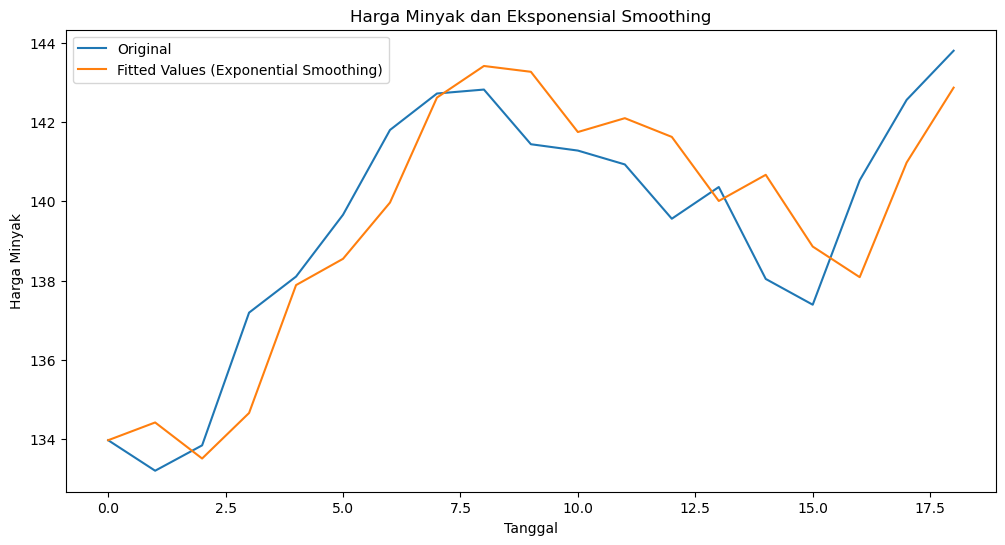

In [27]:
# Menggunakan kolom Close_2 dan Date_2 pada Exponential Smoothing
model_eks = ExponentialSmoothing(data_combined['Close_2'], trend='add', seasonal='add', seasonal_periods=4)
result_eks = model_eks.fit()

# Prediksi menggunakan model eksponensial smoothing
predictions_eks = result_eks.fittedvalues

# Menghitung skor R2 dan MSE
r2_eks = r2_score(data_combined['Close_2'], predictions_eks)
mse_eks = mean_squared_error(data_combined['Close_2'], predictions_eks)

# Menampilkan skor
print(f'R2 Score (Exponential Smoothing): {r2_eks:.4f}')
print(f'Mean Squared Error (MSE) (Exponential Smoothing): {mse_eks:.4f}')

# Plot original series dan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(data_combined['Close_2'], label='Original')
plt.plot(predictions_eks, label='Fitted Values (Exponential Smoothing)')
plt.title('Harga Minyak dan Eksponensial Smoothing')
plt.xlabel('Tanggal')
plt.ylabel('Harga Minyak')
plt.legend()
plt.show()